<a href="https://colab.research.google.com/github/singhamritanshu/EVA4S8/blob/master/main8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.append('/content/drive/My Drive/EVA4S8')

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
# Importing Modules 
import data as d 
import show_images as s 
import model as m 
import train_test as t 

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Finished loading data
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
shape: torch.Size([128, 3, 32, 32])


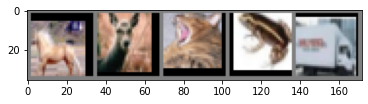

In [3]:
#d.load()
classes, trainloader, testloader = d.load()
s.show_random_images(trainloader, classes)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = m.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
testLoss = []
testAcc = []
print("Device:", device)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    t.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test_loss , test_acc = t.test(model, device, criterion, testloader)
    testLoss.append(test_loss)
    testAcc.append(test_acc)


  0%|          | 0/391 [00:00<?, ?it/s]

Device: cuda
EPOCH: 0


Loss=1.5812002420425415 Batch_id=390 Accuracy=25.19: 100%|██████████| 391/391 [03:07<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 3445/10000 (34.45%)

EPOCH: 1


Loss=1.5997827053070068 Batch_id=390 Accuracy=38.84: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 4518/10000 (45.18%)

EPOCH: 2


Loss=1.2940058708190918 Batch_id=390 Accuracy=48.34: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 4865/10000 (48.65%)

EPOCH: 3


Loss=0.9600597620010376 Batch_id=390 Accuracy=56.37: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 5453/10000 (54.53%)

EPOCH: 4


Loss=0.8977559804916382 Batch_id=390 Accuracy=62.96: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 6025/10000 (60.25%)

EPOCH: 5


Loss=0.7516061067581177 Batch_id=390 Accuracy=66.68: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6625/10000 (66.25%)

EPOCH: 6


Loss=0.8257662057876587 Batch_id=390 Accuracy=70.36: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6799/10000 (67.99%)

EPOCH: 7


Loss=0.7694845199584961 Batch_id=390 Accuracy=73.43: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6988/10000 (69.88%)

EPOCH: 8


Loss=0.6861835718154907 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6975/10000 (69.75%)

EPOCH: 9


Loss=0.6934936046600342 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7073/10000 (70.73%)

EPOCH: 10


Loss=0.6407674551010132 Batch_id=390 Accuracy=77.22: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7542/10000 (75.42%)

EPOCH: 11


Loss=0.6673361659049988 Batch_id=390 Accuracy=78.09: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6497/10000 (64.97%)

EPOCH: 12


Loss=0.6796162724494934 Batch_id=390 Accuracy=78.74: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7374/10000 (73.74%)

EPOCH: 13


Loss=0.5027009844779968 Batch_id=390 Accuracy=78.96: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7417/10000 (74.17%)

EPOCH: 14


Loss=0.6565072536468506 Batch_id=390 Accuracy=79.77: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7342/10000 (73.42%)

EPOCH: 15


Loss=0.42367011308670044 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8500/10000 (85.00%)

EPOCH: 16


Loss=0.3511379361152649 Batch_id=390 Accuracy=87.26: 100%|██████████| 391/391 [03:07<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8586/10000 (85.86%)

EPOCH: 17


Loss=0.2947677969932556 Batch_id=390 Accuracy=87.88: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8589/10000 (85.89%)

EPOCH: 18


Loss=0.24793699383735657 Batch_id=390 Accuracy=88.21: 100%|██████████| 391/391 [03:07<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8611/10000 (86.11%)

EPOCH: 19


Loss=0.3857973515987396 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8676/10000 (86.76%)

EPOCH: 20


Loss=0.2747327387332916 Batch_id=390 Accuracy=89.27: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8676/10000 (86.76%)

EPOCH: 21


Loss=0.32170116901397705 Batch_id=390 Accuracy=89.38: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8706/10000 (87.06%)

EPOCH: 22


Loss=0.3095940351486206 Batch_id=390 Accuracy=89.67: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8736/10000 (87.36%)

EPOCH: 23


Loss=0.28321656584739685 Batch_id=390 Accuracy=89.80: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8706/10000 (87.06%)

EPOCH: 24


Loss=0.47024840116500854 Batch_id=390 Accuracy=90.40: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8769/10000 (87.69%)

EPOCH: 25


Loss=0.2387627810239792 Batch_id=390 Accuracy=90.26: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8730/10000 (87.30%)

EPOCH: 26


Loss=0.3190440237522125 Batch_id=390 Accuracy=90.35: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8677/10000 (86.77%)

EPOCH: 27


Loss=0.19682715833187103 Batch_id=390 Accuracy=90.91: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8741/10000 (87.41%)

EPOCH: 28


Loss=0.24615688621997833 Batch_id=390 Accuracy=91.01: 100%|██████████| 391/391 [03:07<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8766/10000 (87.66%)

EPOCH: 29


Loss=0.17261794209480286 Batch_id=390 Accuracy=91.09: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8741/10000 (87.41%)

EPOCH: 30


Loss=0.13355916738510132 Batch_id=390 Accuracy=92.45: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8907/10000 (89.07%)

EPOCH: 31


Loss=0.2678624987602234 Batch_id=390 Accuracy=93.11: 100%|██████████| 391/391 [03:09<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8874/10000 (88.74%)

EPOCH: 32


Loss=0.18780533969402313 Batch_id=390 Accuracy=93.54: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8892/10000 (88.92%)

EPOCH: 33


Loss=0.0904226079583168 Batch_id=390 Accuracy=93.33: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8925/10000 (89.25%)

EPOCH: 34


Loss=0.2142099142074585 Batch_id=390 Accuracy=93.53: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8932/10000 (89.32%)

EPOCH: 35


Loss=0.14467079937458038 Batch_id=390 Accuracy=93.66: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8919/10000 (89.19%)

EPOCH: 36


Loss=0.1944713294506073 Batch_id=390 Accuracy=93.70: 100%|██████████| 391/391 [03:08<00:00,  2.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8935/10000 (89.35%)

EPOCH: 37


Loss=0.25192007422447205 Batch_id=390 Accuracy=93.83: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8948/10000 (89.48%)

EPOCH: 38


Loss=0.11434070765972137 Batch_id=390 Accuracy=94.07: 100%|██████████| 391/391 [03:08<00:00,  2.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8936/10000 (89.36%)

EPOCH: 39


Loss=0.2664579749107361 Batch_id=390 Accuracy=93.95: 100%|██████████| 391/391 [03:09<00:00,  2.06it/s]



Test set: Average loss: 0.0025, Accuracy: 8939/10000 (89.39%)



In [7]:
def classwise_accuracy(model, device, classes, test_loader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
            	label = labels[i]
            	class_correct[label] += c[i].item()
            	class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 96 %
Accuracy of   car : 100 %
Accuracy of  bird : 90 %
Accuracy of   cat : 72 %
Accuracy of  deer : 91 %
Accuracy of   dog : 83 %
Accuracy of  frog : 93 %
Accuracy of horse : 96 %
Accuracy of  ship : 87 %
Accuracy of truck : 97 %
